# Unity Banana Navigation

## Import packages

In [1]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
import numpy as np
from dqn_agent import Agent

## Create Unity environment

The Unity will open in a new window and you can see your agent running.

In [2]:
env = UnityEnvironment(file_name="Banana")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## DQN Function

This function will run or train the agent. If the agent will reach average score of 13.0 over 100 consecutive episodes it will save the learned weights to the `checkpoint_dqn.pth` file. You can read this weights while initializing new agent to run trained agent

In [3]:
def dqn(agent, n_episodes=4000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.999, train=True):
    """Deep Q-Learning.
    
    Args
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        train (bool): flag deciding if the agent will train or just play through the episode
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps if train else 0.0)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            if train:
                agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0 and train:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_dqn.pth')
            break
    return scores

## Train the agent

Episode 100	Average Score: 0.16
Episode 200	Average Score: 0.56
Episode 300	Average Score: 1.67
Episode 400	Average Score: 2.33
Episode 500	Average Score: 3.13
Episode 600	Average Score: 4.27
Episode 700	Average Score: 5.53
Episode 800	Average Score: 6.19
Episode 900	Average Score: 6.95
Episode 1000	Average Score: 7.73
Episode 1100	Average Score: 7.24
Episode 1200	Average Score: 8.52
Episode 1300	Average Score: 8.92
Episode 1400	Average Score: 10.42
Episode 1500	Average Score: 10.52
Episode 1600	Average Score: 10.62
Episode 1700	Average Score: 11.35
Episode 1800	Average Score: 11.57
Episode 1900	Average Score: 11.44
Episode 2000	Average Score: 11.97
Episode 2100	Average Score: 12.41
Episode 2200	Average Score: 12.42
Episode 2300	Average Score: 12.40
Episode 2374	Average Score: 13.06
Environment solved in 2274 episodes!	Average Score: 13.06


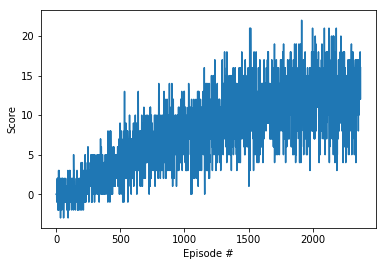

In [5]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores = dqn(agent)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Run trained agent

In [11]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0, filename='checkpoint_dqn.pth')
scores = dqn(agent, n_episodes=100, train=False)

Episode 100	Average Score: 14.29


## Close the environment

In [6]:
env.close()